# Important Libraries:

In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import numpy  as np

In [2]:
mov_names = []
years =[]
mov_type = []
imdb_rat= []
time= []
mt_score =[]
votes = []
us_gross =[]

# Loading Datasets after Scraping:


In [3]:
# run time =1 min and 24 sec
a=1
while a!=1001:
    url= f"https://www.imdb.com/search/title/?groups=top_1000&start={a}"+"&ref_=adv_nxt"
    response = requests.get(url)
    page = response.text
    soup = BeautifulSoup(page, "lxml")

    mov_div=soup.find_all('div', class_='lister-item mode-advanced')
    
    
    for container in mov_div:
        name=container.h3.a.text
        mov_names.append (name)
    
        year= container.h3.find('span',class_='lister-item-year').text
        years.append(year)
    
        mv_type =container.p.find('span',class_='genre').text if container.p.find('span',class_='genre').text else '-'
        mov_type.append(mv_type)
    
        imdb= float(container.strong.text)
        imdb_rat.append(imdb)
    
        runtim =container.p.find('span',class_='runtime').text if container.p.find('span',class_='runtime').text else '-'
        time.append(runtim)
    
        meta_s=container.find('span',class_='metascore').text if container.find('span',class_='metascore') else '-'
        mt_score.append(meta_s)
    
        nv= container.find_all('span',attrs={'name': 'nv'})
    
        vote = nv[0].text
        votes.append(vote)
    
        gros=nv[1].text if len(nv)>1 else '-'
        us_gross.append(gros)
    
    
    
    
    
    a=a+50 

# Rename Columns: 

In [4]:
movies = pd.DataFrame({
    'movie' : mov_names,
    'years': years,
    'type' : mov_type,
    'IMDB_RATE': imdb_rat,
    'timeMin': time,
    'metascore': mt_score,
    'votes' : votes,
     'US_grossM': us_gross,
    
})
movies.head(1000)

,movie,years,type,IMDB_RATE,timeMin,metascore,votes,US_grossM
0,Dune: Part One,(2021),"\nAction, Adventure, Drama",8.2,155 min,74,"372,975",-
1,Home Alone,(1990),"\nComedy, Family",7.6,103 min,63,"519,789",$285.76M
2,Jai Bhim,(2021),"\nCrime, Drama",9.5,164 min,-,"152,618",-
3,Ghostbusters,(1984),"\nAction, Comedy, Fantasy",7.8,105 min,71,"386,036",$238.63M
4,Harry Potter and the Sorcerer's Stone,(2001),"\nAdventure, Family, Fantasy",7.6,152 min,65,"713,840",$317.58M
...,...,...,...,...,...,...,...,...
945,Kai po che!,(2013),"\nDrama, Sport",7.8,130 min,40,"35,673",$1.12M
946,Vizontele,(2001),"\nComedy, Drama",8.0,110 min,-,"35,516",-
947,Nefes: Vatan Sagolsun,(2009),"\nAction, Drama, Thriller",8.0,128 min,-,"33,009",-
948,English Vinglish,(2012),"\nComedy, Drama, Family",7.8,134 min,-,"35,292",$1.67M


# Data Exploration:

In [5]:
movies.shape

(950, 8)

In [6]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   movie      950 non-null    object 
 1   years      950 non-null    object 
 2   type       950 non-null    object 
 3   IMDB_RATE  950 non-null    float64
 4   timeMin    950 non-null    object 
 5   metascore  950 non-null    object 
 6   votes      950 non-null    object 
 7   US_grossM  950 non-null    object 
dtypes: float64(1), object(7)
memory usage: 59.5+ KB


In [7]:
movies.describe()

,IMDB_RATE
count,950.000000
mean,7.973158
std,0.281733
min,7.600000
25%,7.800000
50%,7.900000
75%,8.100000
max,9.500000


 # Data cleaning 

### -Missing values:

In [8]:
movies.isnull().sum()

movie        0
years        0
type         0
IMDB_RATE    0
timeMin      0
metascore    0
votes        0
US_grossM    0
dtype: int64

### -Duplicate Rows:

In [9]:
movies.duplicated().sum()

0

### -Type of Data  before change:

In [10]:
print(movies.dtypes)  

movie         object
years         object
type          object
IMDB_RATE    float64
timeMin       object
metascore     object
votes         object
US_grossM     object
dtype: object


### Cleaning the numaric data from object to int:

In [11]:
# cleaning the  numeric data from object to int
movies['years'] = movies['years'].str.extract('(\d+)').astype(int)
movies['timeMin'] = movies['timeMin'].str.extract('(\d+)').astype(int)


movies['votes'] = movies['votes'].str.replace(',', '').astype(int)


# for the gross data we first need to omit the ($ and M) then convert the object into  float
movies['US_grossM'] = movies['US_grossM'].map(lambda x: x.lstrip('$').rstrip('M'))
movies['US_grossM'] = pd.to_numeric(movies['US_grossM'],errors ='coerce') #not all the calumon having numbers
                                                                       # so (coerce) is to convert the dashes to NAN
    

movies['metascore'] = pd.to_numeric(movies['metascore'],errors ='coerce')


### -Type of Data after change:

In [12]:
print(movies.dtypes)

movie         object
years          int32
type          object
IMDB_RATE    float64
timeMin        int32
metascore    float64
votes          int32
US_grossM    float64
dtype: object


In [13]:
# selecting the numeric data only
moviees = movies.select_dtypes(exclude=['object']).copy()
moviees.head(10)


,years,IMDB_RATE,timeMin,metascore,votes,US_grossM
0,2021,8.2,155,74.0,372975,NaN
1,1990,7.6,103,63.0,519789,285.76
2,2021,9.5,164,NaN,152618,NaN
3,1984,7.8,105,71.0,386036,238.63
4,2001,7.6,152,65.0,713840,317.58
5,1999,8.7,136,73.0,1784332,171.48
6,2019,8.4,181,78.0,968981,858.37
7,1988,8.2,132,72.0,829011,83.01
8,1994,9.3,142,80.0,2501180,28.34
9,2019,7.9,130,82.0,554611,165.36


In [14]:
# converting the nan to 0 so it can be recognized as numeric data 
moviees[np.isnan(moviees)] = 0
moviees.head(10)
   

,years,IMDB_RATE,timeMin,metascore,votes,US_grossM
0,2021,8.2,155,74.0,372975,0.00
1,1990,7.6,103,63.0,519789,285.76
2,2021,9.5,164,0.0,152618,0.00
3,1984,7.8,105,71.0,386036,238.63
4,2001,7.6,152,65.0,713840,317.58
5,1999,8.7,136,73.0,1784332,171.48
6,2019,8.4,181,78.0,968981,858.37
7,1988,8.2,132,72.0,829011,83.01
8,1994,9.3,142,80.0,2501180,28.34
9,2019,7.9,130,82.0,554611,165.36


In [15]:
Moviees= moviees[moviees.loc[:]!=0].dropna()

In [16]:
Moviees.shape

(701, 6)

### converting the movies type into dummies variable 

In [17]:
type_dummies = pd.get_dummies(movies['type'],drop_first=True)

type_dummies.head()

,"\nAction, Adventure, Biography","\nAction, Adventure, Comedy","\nAction, Adventure, Crime","\nAction, Adventure, Drama","\nAction, Adventure, Family","\nAction, Adventure, Fantasy","\nAction, Adventure, Horror","\nAction, Adventure, Mystery","\nAction, Adventure, Romance","\nAction, Adventure, Sci-Fi",...,\nHorror,"\nHorror, Mystery, Sci-Fi","\nHorror, Mystery, Thriller","\nHorror, Sci-Fi","\nHorror, Thriller","\nMystery, Romance, Thriller","\nMystery, Sci-Fi, Thriller","\nMystery, Thriller",\nThriller,\nWestern
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# re-joine the type_dummies the the dataframe
movieD=moviees.join(type_dummies)  
movieD.head()

,years,IMDB_RATE,timeMin,metascore,votes,US_grossM,"\nAction, Adventure, Biography","\nAction, Adventure, Comedy","\nAction, Adventure, Crime","\nAction, Adventure, Drama",...,\nHorror,"\nHorror, Mystery, Sci-Fi","\nHorror, Mystery, Thriller","\nHorror, Sci-Fi","\nHorror, Thriller","\nMystery, Romance, Thriller","\nMystery, Sci-Fi, Thriller","\nMystery, Thriller",\nThriller,\nWestern
0,2021,8.2,155,74.0,372975,0.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1990,7.6,103,63.0,519789,285.76,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021,9.5,164,0.0,152618,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1984,7.8,105,71.0,386036,238.63,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2001,7.6,152,65.0,713840,317.58,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Regression

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

X, y = Moviees.drop('IMDB_RATE',axis=1), Moviees['IMDB_RATE']


X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=10)

In [21]:
#set up the 3 models we're choosing from:

lm = LinearRegression()

#Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

lm_reg = Ridge(alpha=1)

#Feature transforms for train, val, and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_val_poly = poly.transform(X_val.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()

In [22]:
lm.fit(X_train, y_train)
print(f'Linear Regression val R^2: {lm.score(X_val, y_val):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression val R^2: {lm_reg.score(X_val_scaled, y_val):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 polynomial regression val R^2: {lm_poly.score(X_val_poly, y_val):.3f}')

Linear Regression val R^2: 0.591
Ridge Regression val R^2: 0.591
Degree 2 polynomial regression val R^2: 0.551


In [23]:
lm.fit(X,y)
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

Linear Regression test R^2: 0.627


# prediction

In [24]:
lm.predict(X_test.head())

array([7.98230626, 8.69023834, 7.79408734, 8.11430582, 7.7234576 ])

In [25]:
X_test.head(5)

,years,timeMin,metascore,votes,US_grossM
209,2014,117,76.0,503622,32.38
86,2003,201,94.0,1728234,377.85
926,2007,122,85.0,31670,0.74
466,1950,138,98.0,127015,0.01
356,2008,94,55.0,204984,9.03


In [26]:
y_test.head(5)

209    7.8
86     8.9
926    7.8
466    8.2
356    7.8
Name: IMDB_RATE, dtype: float64

## Cross-Validation

In [27]:
from sklearn.model_selection import KFold

X, y = Moviees.drop('IMDB_RATE',axis=1), Moviees['IMDB_RATE']

X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10) #hold out 20% of the data for final testing

#this helps with the way kf will generate indices below
X, y = np.array(X), np.array(y)

In [28]:
#run the CV

kf = KFold(n_splits=5, shuffle=True, random_state = 71)
cv_lm_r2s, cv_lm_reg_r2s = [], [] #collect the validation results for both models

for train_ind, val_ind in kf.split(X,y):
    
    X_train, y_train = X[train_ind], y[train_ind]
    X_val, y_val = X[val_ind], y[val_ind] 
    
    #simple linear regression
    lm1 = LinearRegression()
    lm_reg = Ridge(alpha=1)

    lm1.fit(X_train, y_train)
    cv_lm_r2s.append(lm1.score(X_val, y_val))
    
    #ridge with feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lm_reg.fit(X_train_scaled, y_train)
    cv_lm_reg_r2s.append(lm_reg.score(X_val_scaled, y_val))

print('Simple regression scores: ', cv_lm_r2s)
print('Ridge scores: ', cv_lm_reg_r2s, '\n')

print(f'Simple mean cv r^2: {np.mean(cv_lm_r2s):.3f} +- {np.std(cv_lm_r2s):.3f}')
print(f'Ridge mean cv r^2: {np.mean(cv_lm_reg_r2s):.3f} +- {np.std(cv_lm_reg_r2s):.3f}')

Simple regression scores:  [0.5012579780166053, 0.5157245674068272, 0.6916710987053629, 0.4072816407699177, 0.5560081017387508]
Ridge scores:  [0.5012686910278185, 0.5158754705537714, 0.691068954675587, 0.4080964155223217, 0.5560781063682825] 

Simple mean cv r^2: 0.534 +- 0.093
Ridge mean cv r^2: 0.534 +- 0.092


In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)

lm_reg = Ridge(alpha=1)
lm_reg.fit(X_scaled,y)
print(f'Ridge Regression test R^2: {lm_reg.score(X_test_scaled, y_test):.3f}')

Ridge Regression test R^2: 0.627


## K-fold

In [30]:
from sklearn.model_selection import cross_val_score
lm1 = LinearRegression()

cross_val_score(lm1, X, y, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric

array([0.550615  , 0.6513686 , 0.44019961, 0.62673732, 0.30169595])

In [31]:
kf = KFold(n_splits=5, shuffle=True, random_state = 70)

print(np.mean(cross_val_score(lm1, X, y, cv=kf, scoring='r2')))
print(np.mean(cross_val_score(lm_reg, X, y, cv=kf, scoring='r2')))

0.5448643606844045
0.5448644380379208


## DATA Visualizing

In [32]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline


In [33]:
# reordring the columns since the metascore is our output variable 

MOVIE=Moviees.reindex(columns= ['IMDB_RATE','years','metascore','timeMin','votes','US_grossM'])
MOVIE.head()

,IMDB_RATE,years,metascore,timeMin,votes,US_grossM
1,7.6,1990,63.0,103,519789,285.76
3,7.8,1984,71.0,105,386036,238.63
4,7.6,2001,65.0,152,713840,317.58
5,8.7,1999,73.0,136,1784332,171.48
6,8.4,2019,78.0,181,968981,858.37


In [34]:
MOVIE.corr()

,IMDB_RATE,years,metascore,timeMin,votes,US_grossM
IMDB_RATE,1.000000,-0.192127,0.271743,0.256006,0.604609,0.104874
years,-0.192127,1.000000,-0.316053,0.016060,0.217263,0.251586
metascore,0.271743,-0.316053,1.000000,-0.009532,-0.008673,-0.051628
timeMin,0.256006,0.016060,-0.009532,1.000000,0.209798,0.160741
votes,0.604609,0.217263,-0.008673,0.209798,1.000000,0.555150
US_grossM,0.104874,0.251586,-0.051628,0.160741,0.555150,1.000000


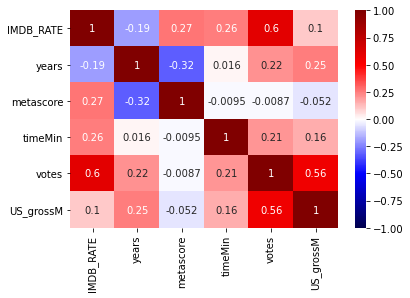

In [35]:
# for a better corr matrix
sns.heatmap(MOVIE.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

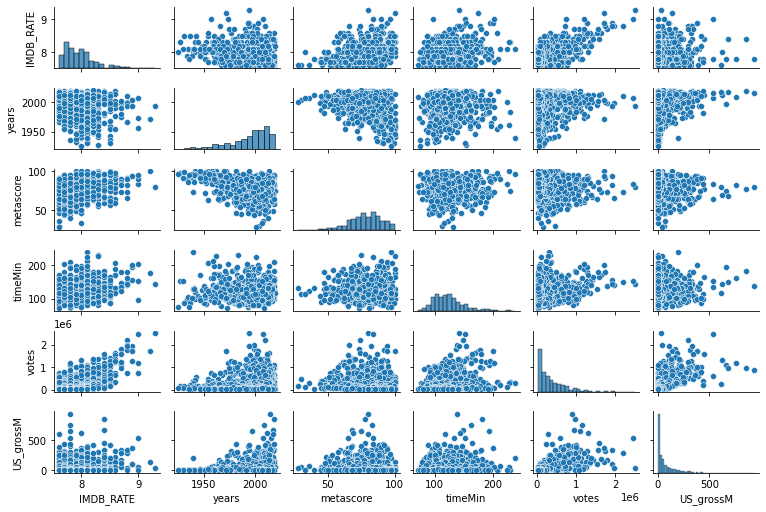

In [36]:
# Plot all of the variable-to-variable relations as scatterplots
sns.pairplot(MOVIE, height=1.2, aspect=1.5);

# Regression Statistics

In [37]:
# Create  feature matrix (X) and target vector (y)
y, X = patsy.dmatrices(' IMDB_RATE  ~ years  + timeMin +metascore+ votes + US_grossM ', data=MOVIE, return_type="dataframe")

# Create  model
model = sm.OLS(y, X)

# Fit the model to the training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              IMDB_RATE   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     190.6
Date:                Tue, 07 Dec 2021   Prob (F-statistic):          1.10e-127
Time:                        20:10:45   Log-Likelihood:                 181.71
No. Observations:                 701   AIC:                            -351.4
Df Residuals:                     695   BIC:                            -324.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     14.0348      0.805     17.432      0.000      12.454      15.616
years         -0.0034      0.000     -8.618      0.000      -0.004      -0.003
timeMin        0.0016      0.000      5.650      0.000       0.001       0.002
metascore      0.0045      0.001      7.364      0.000       0.003       0.006
votes       5.945e-07   2.28e-08     26.052      0.000     5.5e-07    6.39e-07
US_grossM     -0.0007   7.44e-05     -9.503      0.000      -0.001      -0.001
==============================================================================
Omnibus:                       36.354   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.066
Skew:                           0.549   Prob(JB):                     1.21e-09
Kurtosis:                       3.446   Cond. No.                     6.07e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.07e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

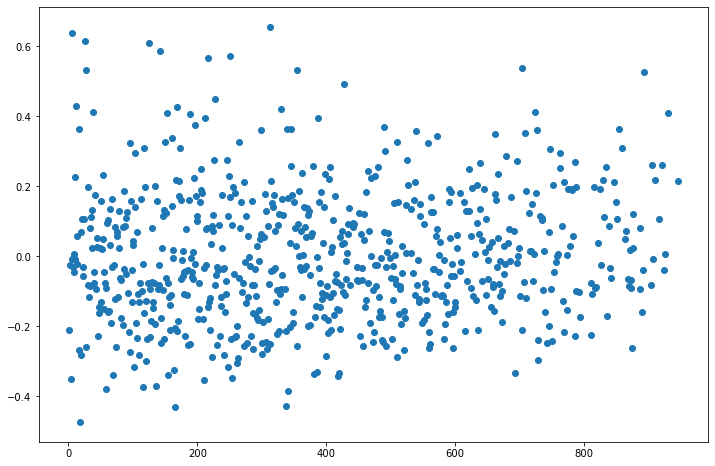

In [38]:
fit.resid.plot(style='o', figsize=(12,8));

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[None, None]

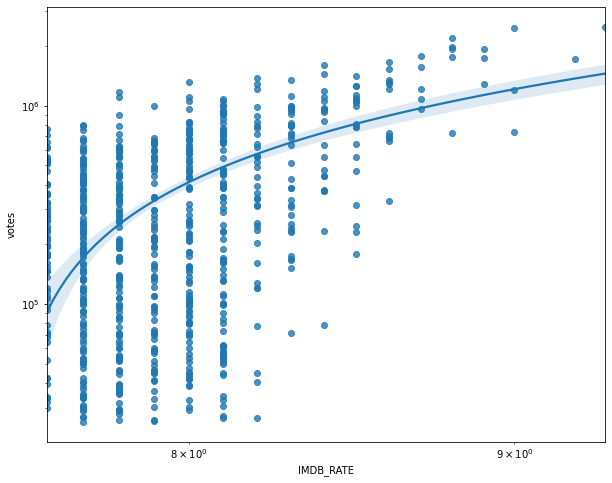

In [39]:
plt.figure(figsize=(10,8))
rat=sns.regplot(Moviees.IMDB_RATE,Moviees.votes)
plt.line_kws={"color":"blue"}
rat.set(xscale="log",yscale="log")
plt.show()
sns.regplot(x= "IMDB_RATE", y="votes",data=Moviees,fit_reg=False,scatter_kws={"alpha":0.2})


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


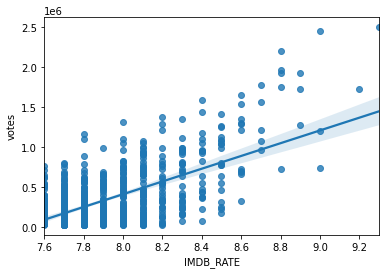

In [40]:
rat=sns.regplot(Moviees.IMDB_RATE,Moviees.votes)
sns.regplot(x= "IMDB_RATE", y="votes",data=Moviees,fit_reg=False,scatter_kws={"alpha":0.2},line_kws={"color":"black"})
plt.show()

# prediction

In [41]:
lm.predict(X_test.head())

array([7.98230626, 8.69023834, 7.79408734, 8.11430582, 7.7234576 ])

In [42]:
X_test.head(5)

,years,timeMin,metascore,votes,US_grossM
209,2014,117,76.0,503622,32.38
86,2003,201,94.0,1728234,377.85
926,2007,122,85.0,31670,0.74
466,1950,138,98.0,127015,0.01
356,2008,94,55.0,204984,9.03


In [43]:
y_test.head(5)

209    7.8
86     8.9
926    7.8
466    8.2
356    7.8
Name: IMDB_RATE, dtype: float64

# prediction for top 5 IMDB rating

In [44]:
Movies_top_Rating= Moviees.sort_values(["votes"],ascending=False)
Movies_Top_Rating=Movies_top_Rating.join(movies.movie) 
Movies_Top_Rating=Movies_Top_Rating.reindex(columns= ['movie','years','IMDB_RATE','metascore','timeMin','votes','US_grossM'])
Movies_Top_Rating.head()


,movie,years,IMDB_RATE,metascore,timeMin,votes,US_grossM
8,The Shawshank Redemption,1994,9.3,80.0,142,2501180,28.34
21,The Dark Knight,2008,9.0,84.0,152,2451090,534.86
23,Inception,2010,8.8,74.0,148,2199445,292.58
33,Fight Club,1999,8.8,66.0,139,1967700,37.03
53,Forrest Gump,1994,8.8,82.0,142,1930604,330.25


In [45]:
# we will enter the X_data and use the trained model to predicat the IMDB rating


top_5 = pd.DataFrame({

    'years' : [1994,2008,2010,1999,1994],
    'timeMn' : [142,152,148,139,142],
    'metascore':[80.0,84.0,74.0,66.0,82.0],
    'votes' : [2501166,2451071,2199430,1967682,1930591],
     'US_grossM': [28.34,534.86,292.58,37.03,330.25]
})
top_5.head()

,years,timeMn,metascore,votes,US_grossM
0,1994,142,80.0,2501166,28.34
1,2008,152,84.0,2451071,534.86
2,2010,148,74.0,2199430,292.58
3,1999,139,66.0,1967682,37.03
4,1994,142,82.0,1930591,330.25


In [46]:
#the data predicated
rate_pr=lm.predict(top_5.head())
rate_pr 

array([9.28156541, 8.86992625, 8.84483244, 8.88399824, 8.73443468])

In [47]:
Movies_Top_Rating.IMDB_RATE.head(5)


8     9.3
21    9.0
23    8.8
33    8.8
53    8.8
Name: IMDB_RATE, dtype: float64

No handles with labels found to put in legend.


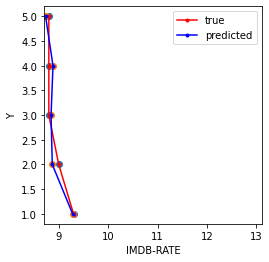

In [48]:
y=[1,2,3,4,5]
plt.scatter(Movies_Top_Rating.IMDB_RATE.head(5),y)
plt.plot(Movies_Top_Rating.IMDB_RATE.head(5),y, '.r-')
plt.scatter(rate_pr,y)
plt.plot(rate_pr,y, '.b-')
plt.xlabel('IMDB-RATE')
plt.ylabel('Y')
plt.legend(ncol=2)
plt.axis('equal')
plt.axis('square')
_ = plt.plot([-50, 50], [-50, 50])
plt.legend(["true", "predicted"], loc ="upper right")
  

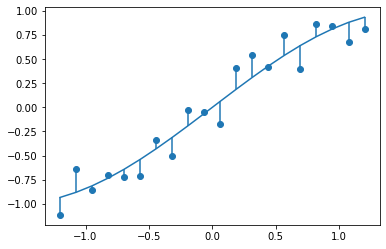

In [28]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-1.2,1.2,20)
y = np.sin(x)
dy = (np.random.rand(20)-0.5)*0.5

fig, ax = plt.subplots()
ax.plot(x,y)
ax.scatter(x,y+dy)

ax.vlines(x,y,y+dy)

plt.show()